In this notebook, we will be creating a CNN (Convolutional Neural Network) based classifier for the classification of CIFAR-10 dataset.

**About the dataset**

CIFAR-10 dataset is a subset of CIFAR-100 having 80 million images of 100 different objects. CIFAR-10 takes 60,000 images for 10 classes from the original dataset in which 50,000 images are for training and 10,000 images are for testing.

The classes in the dataset are -
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

In [14]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler
import numpy as np
from PIL import Image

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

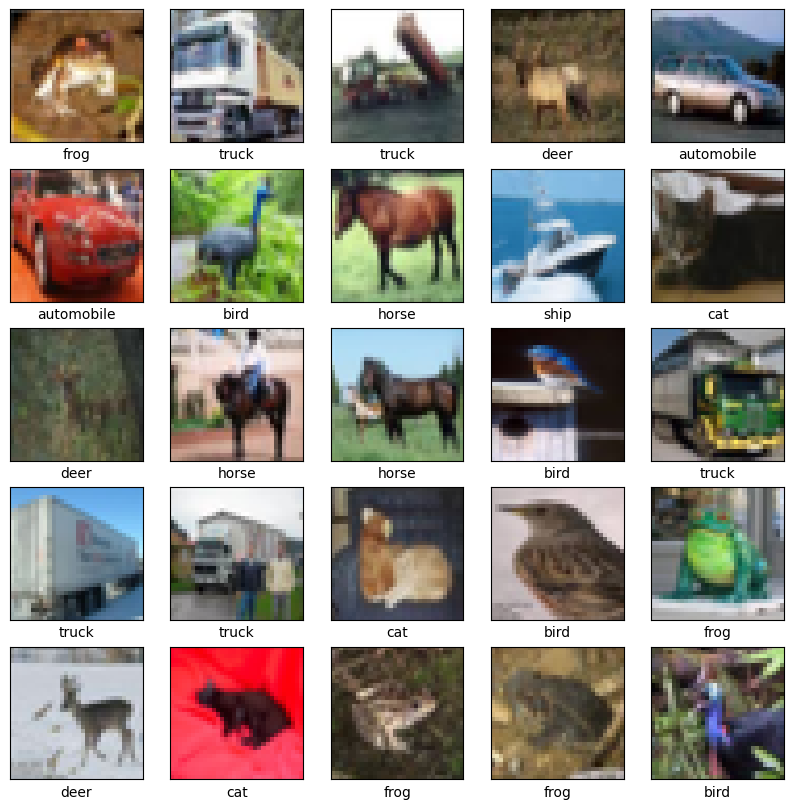

In [15]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

**Creating a CNN model**

We are going to create a CNN based classification model using *keras* module.

In [16]:
model = models.Sequential()

model.add(layers.Conv2D(64,(3,3),activation='relu', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(256,(3,3),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10))

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 30, 30, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 13, 13, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 13, 13, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 4, 4, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 440,970 (1.68 MB)

 Trainable params: 440,074 (1.68 MB)

 Non-trainable params: 896 (3.50 KB)

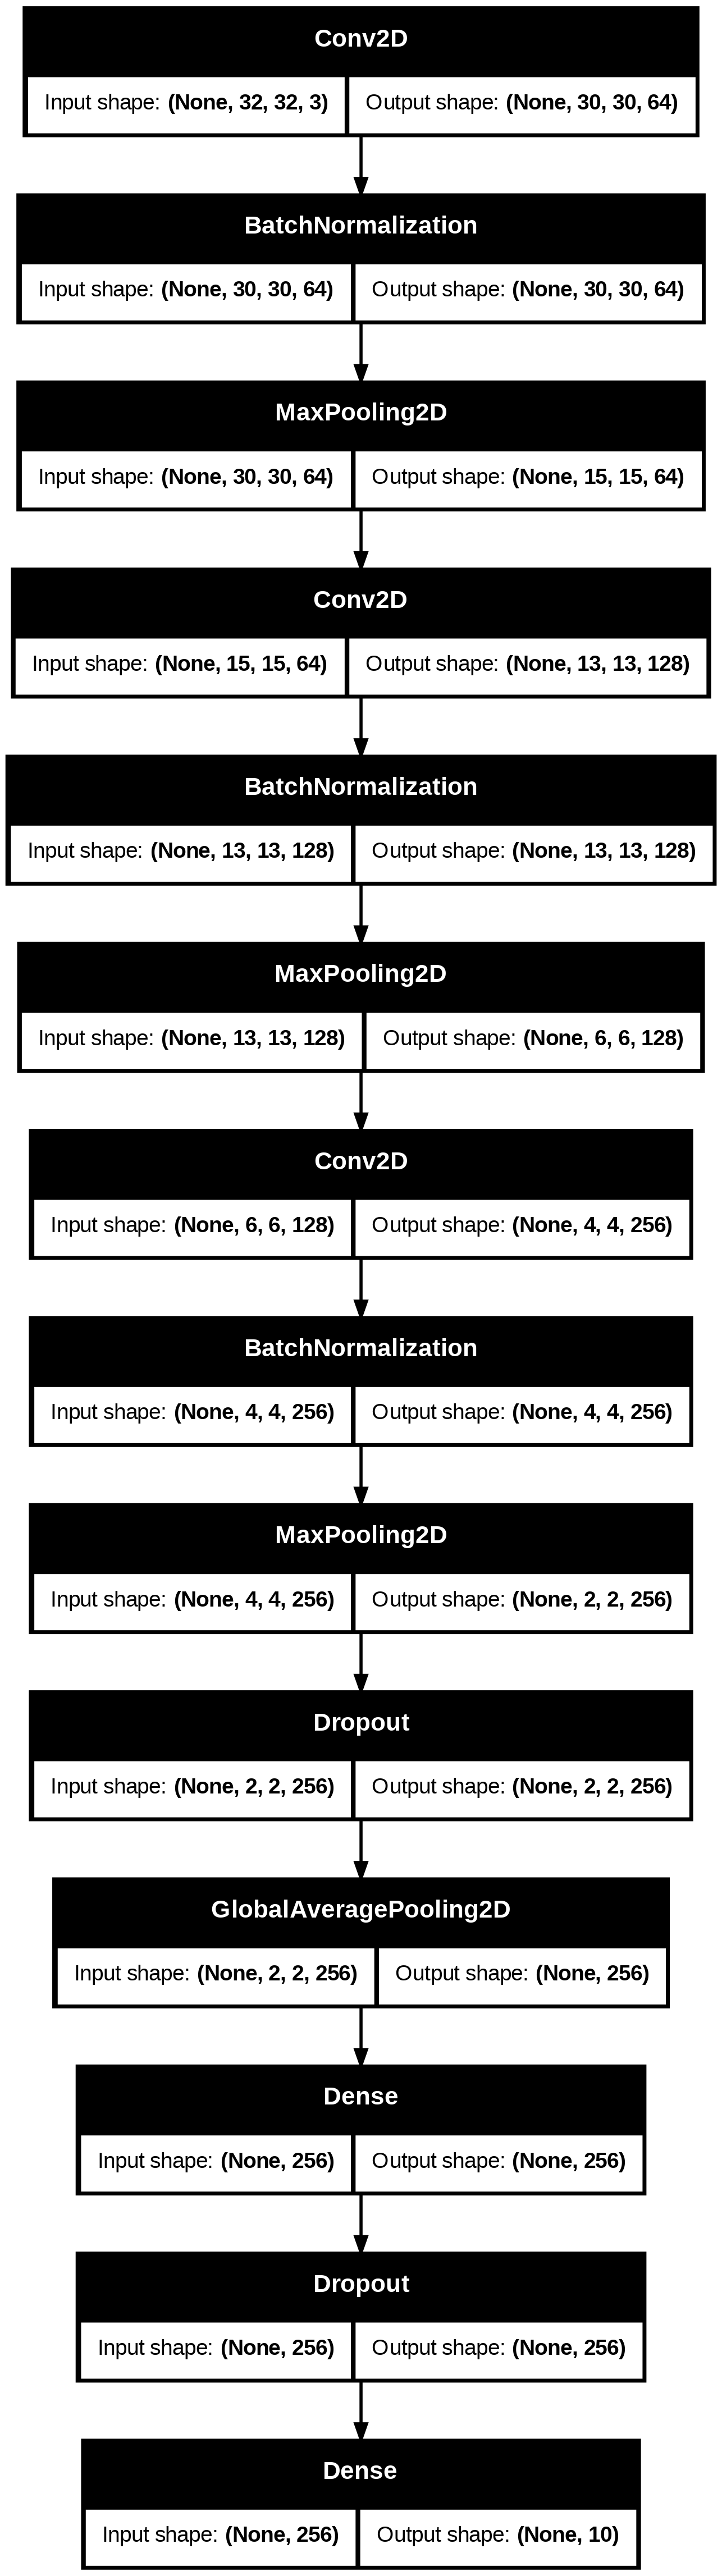

In [17]:
# Import plot_model for visualizing the model architecture
from tensorflow.keras.utils import plot_model
from IPython.display import Image

# Save and visualize the model architecture
plot_model(model, to_file="model_architecture.png", show_shapes=True)
Image(filename="model_architecture.png")


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

# Fit the data generator on the training set
datagen.fit(train_images)

In [19]:
# Define the ReduceLROnPlateau callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Fit the model with the ReduceLROnPlateau callback
history = model.fit(train_images, train_labels,
                    epochs=50,
                    batch_size=32,
                    validation_data=(test_images, test_labels),
                    callbacks=[reduce_lr])

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 279s 174ms/step - accuracy: 0.3104 - loss: 1.9894 - val_accuracy: 0.5312 - val_loss: 1.3288 - learning_rate: 1.0000e-04
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 321s 173ms/step - accuracy: 0.4984 - loss: 1.4058 - val_accuracy: 0.5835 - val_loss: 1.1665 - learning_rate: 1.0000e-04
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 322s 174ms/step - accuracy: 0.5693 - loss: 1.2300 - val_accuracy: 0.6371 - val_loss: 1.0365 - learning_rate: 1.0000e-04
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 320s 172ms/step - accuracy: 0.6146 - loss: 1.1019 - val_accuracy: 0.6639 - val_loss: 0.9412 - learning_rate: 1.0000e-04
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 325s 174ms/step - accuracy: 0.6492 - loss: 1.0024 - val_accuracy: 0.6837 - val_loss: 0.8890 - learning_rate: 1.0000e-04
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 331s 180ms/step - accuracy: 0.6714 - loss: 0.9253 - val_accuracy: 0.7013 - val_loss: 0.8705 - learning_rate: 1.0000e-04
Epoch 7/50
1563/1563 ━━━━━━━

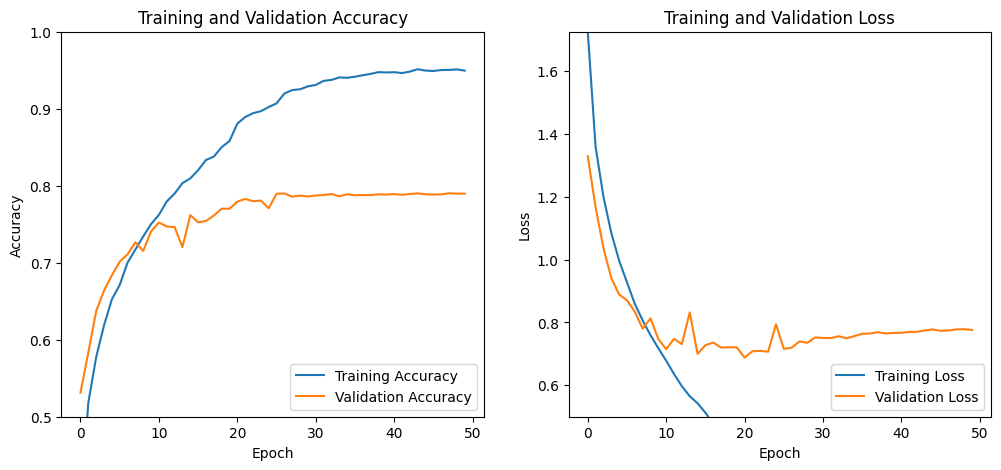

313/313 - 11s - 36ms/step - accuracy: 0.7897 - loss: 0.7761


In [20]:
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.5, max(history.history['loss'])])
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

plt.show()
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [21]:
print(test_acc)

0.7896999716758728


In [22]:
# save model
model.save('final_model.h5')

In [27]:
# Import necessary modules
from tensorflow.keras import preprocessing, models
import numpy as np

# Load and prepare a batch of images
def load_images(filenames):
    # Initialize a list to hold all preprocessed images
    images = []
    for filename in filenames:
        # Load the image
        img = preprocessing.image.load_img(filename, target_size=(32, 32))
        # Convert to array
        img = preprocessing.image.img_to_array(img)
        # Normalize pixel data
        img = img.astype('float32') / 255.0
        # Append to images list
        images.append(img)
    # Stack images into a batch
    return np.stack(images, axis=0)

# Load multiple images and predict their classes
def run_example():
    # List of image paths to predict
    filenames = ['cat.png', 'bird.png', 'truck.png', 'webotscat.png', 'webotscatto.png']  # Add as many as needed
    # Load images
    imgs = load_images(filenames)
    # Load model
    model = models.load_model('final_model.h5')
    # Predict classes for the batch of images
    predictions = model.predict(imgs)
    # Display predictions
    for i, pred in enumerate(predictions):
        result = np.argmax(pred)
        print(f"Prediction for {filenames[i]}:", class_names[result])

# Run the example
run_example()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
Prediction for cat.png: cat
Prediction for bird.png: bird
Prediction for truck.png: truck
Prediction for webotscat.png: horse
Prediction for webotscatto.png: horse
